In [1]:
## 붓꽃 데이터 품종 예측하기

In [2]:
import sklearn
sklearn.__version__

'1.0.2'

In [4]:
# 사이킷런에서 제공하는 모듈들 로딩
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [5]:
import numpy as np
import pandas as pd

In [7]:
# 붓꽃 데이터 세트를 로딩
iris_dataset = load_iris()

In [8]:
type(iris_dataset)

sklearn.utils.Bunch

In [10]:
iris_dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [12]:
iris_dataset["data"][:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [13]:
iris_dataset["data"].shape

(150, 4)

In [14]:
iris_dataset["feature_names"]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [15]:
iris_dataset["target"]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [16]:
iris_dataset["target"].shape

(150,)

In [18]:
iris_dataset["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [20]:
print(iris_dataset["DESCR"])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [25]:
iris_df = pd.DataFrame(data=iris_dataset["data"], columns=iris_dataset["feature_names"])
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


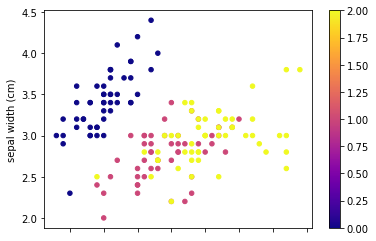

In [29]:
iris_df.plot(kind="scatter", x="sepal length (cm)", y= "sepal width (cm)", c=iris_dataset["target"], cmap="plasma")

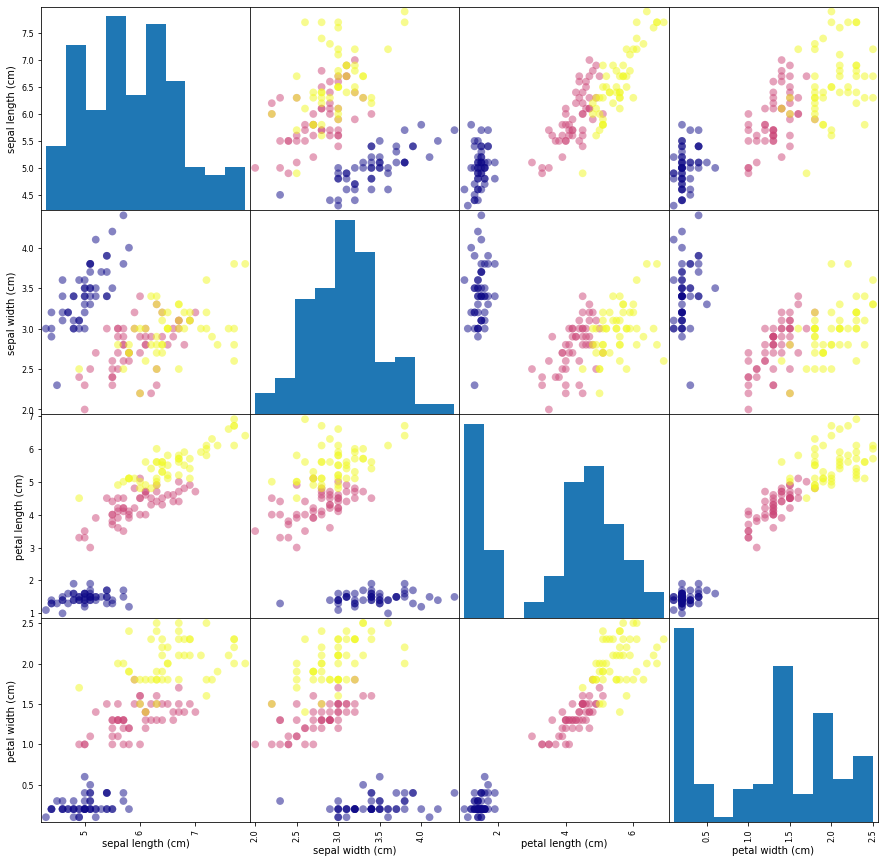

In [35]:
a = pd.plotting.scatter_matrix(iris_df, figsize=(15, 15),  c=iris_dataset["target"], cmap="plasma",
                           marker="o", s=60, alpha=0.5)

In [44]:
# 학습(훈련) 데이터와 테스트 데이터 세트로 분리 (shuffle -> split)
X_train, X_test, y_train, y_test = train_test_split(iris_dataset["data"],iris_dataset["target"], test_size=0.2, random_state = 42)

In [45]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [47]:
# 모델 선택, 학습 

# knn 분류기 생성
knn_clf = KNeighborsClassifier()

knn_clf.fit(X_train, y_train) # 주어진 학습 데이터에 계속 맞춰가는 작업, 데이터의 패턴을 알아가는 작업
                              # (예측과 실제의 차이 = 오류)를 줄여가는 방향으로 내부 "모델 파라미터(가중치)"를 업데이트
                              # 모델 = 수학적인 방정식 


KNeighborsClassifier()

In [50]:
# 테스트 데이터 세트로 예측
predict = knn_clf.predict(X_test)
print(predict)
print(y_test)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


In [57]:
from sklearn.metrics import accuracy_score

# 성능 평가 (정확도) 18/20 ->90 점
sum(predict == y_test)/len(y_test)

# np.mean(predict == y_test)
# knn_clf.score(X_test, y_test)
accuracy_score(y_test, predict)

1.0

In [61]:
X_new, X_new.shape

(array([5. , 2.9, 1. , 9.2]), (4,))

In [62]:
X_new.reshape(1, -1), X_new.reshape(1, -1).shape

(array([[5. , 2.9, 1. , 9.2]]), (1, 4))

In [63]:
# 꽃받침 길이, 너비 : 5cm, 2,9cm , 꽃잎 길이, 너비: 1cm, 0.2cm
X_new = np.array([5, 2.9, 1, 9.2])
predict_new = knn_clf.predict(X_new.reshape(1, -1))
predict_new

array([2])